# AceleraDev Data Science - Semana 3

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. 

Para realizar a verificação inicial, precisamos de alguns valores.
Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importando os dados

In [2]:
base_cred = pd.read_csv('desafio1.csv')

In [3]:
print("----------Head----------")
print(base_cred.head(5))

----------Head----------
   RowNumber                                        id  \
0          1  e7f44fcbd380d4cef7e6c232cc7e37895c3fd197   
1          2  28dcb083ad90512da16b9430085c2cddb8ca5e12   
2          3  774bc378f787438c9c7594e536787d07a097a54b   
3          4  043a71326f7096de155e7f0c559dc62b5e4b7239   
4          5  37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22   

                                  sobrenome  pontuacao_credito  \
0  6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50                619   
1  48e1ad846796fa314f1b4a6702b83343eb5482c5                608   
2  f2b29d5d934de615812b697132e767dea0f1e9e2                502   
3  85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2                699   
4  ddc89c837a6933639de75f28171057060bd322df                850   

  estado_residencia genero  idade  nivel_estabilidade  saldo_conta  \
0                SC      F     42                   2         0.00   
1                RS      F     41                   1     83807.86   
2                SC

In [4]:
print("-----------Information-----------")
print(base_cred.info())

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB
None


In [5]:
print("-----------Data Types-----------")
print(base_cred.dtypes)

-----------Data Types-----------
RowNumber                     int64
id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object


In [6]:
print("----------Missing value-----------")
print(base_cred.isnull().sum())

----------Missing value-----------
RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64


In [7]:
print("----------Null value-----------")
print(base_cred.isna().sum())

----------Null value-----------
RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64


In [8]:
print("----------Shape of Data----------")
print(base_cred.shape)

----------Shape of Data----------
(7000, 12)


Sabemos que esse dataset tem 7000 linhas e 12 colunas e nenhum valor faltante ou nulo.

In [9]:
base_cred.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


## Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

In [10]:
# Calculando a média em 'Pontuação crédito'
base_cred['pontuacao_credito'].mean().round(2)

649.79

In [11]:
# Calculando a mediana em 'Pontuação crédito'
base_cred['pontuacao_credito'].median().round(2)

651.0

In [12]:
# Calculando o desvio padrão em 'Pontuação crédito'
base_cred['pontuacao_credito'].std().round(2)

97.05

In [13]:
# Mesmo cálculo utilizando describe
base_cred['pontuacao_credito'].describe()

count    7000.000000
mean      649.787000
std        97.046279
min       350.000000
25%       582.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: pontuacao_credito, dtype: float64

In [14]:
# Utilizando 'agg' para criar um dataframe com as funções média, moda, mediana e desvio padrão:
subm = base_cred.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode,np.median,np.mean,np.std])
subm.round(2)

,mode,median,mean,std
estado_residencia,,,,
PR,850,650,648.96,98.61
RS,850,650,651.11,95.14
SC,850,653,649.54,97.23


In [15]:
# Utilizando sort values para deixar em ordem decrescente (padrão exigido para a resposta):
subm = subm.sort_values(by='estado_residencia', ascending=False)
subm.round(2)

,mode,median,mean,std
estado_residencia,,,,
SC,850,653,649.54,97.23
RS,850,650,651.11,95.14
PR,850,650,648.96,98.61


In [16]:
# Renomeando as colunas para a resposta se adequar ao solicitado:
resposta = subm.rename(columns={"mode": "moda", "median": "mediana", "mean": "media", "std": "desvio_padrao"})

In [16]:
# Gravando o arquivo json:
resposta.to_json('submission.json',orient='index')

## Estudos adicionais - Análise Exploratória dos dados

➡️ &nbsp; Material encontrado no repositório do Nilson Oliveira 
https://github.com/nilrco/codenation

In [17]:
import warnings
warnings.filterwarnings('ignore')

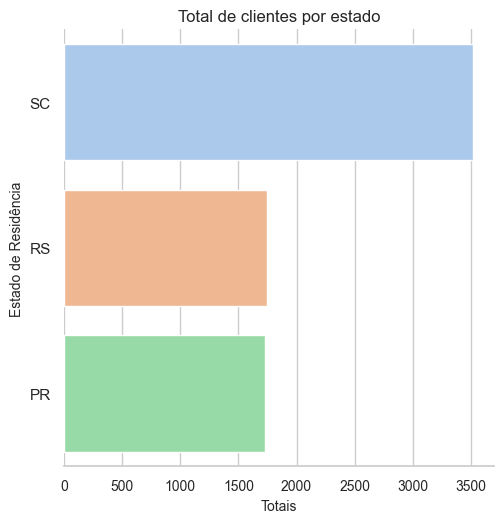

In [18]:
%matplotlib notebook
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

ax = sns.catplot(y='estado_residencia', kind='count', palette='pastel', data=base_cred)

plt.ylabel('Estado de Residência', size=10)
plt.xlabel('Totais', size=10)
plt.xticks(size=10)
plt.title('Total de clientes por estado')
sns.despine(left=True)
plt.show()

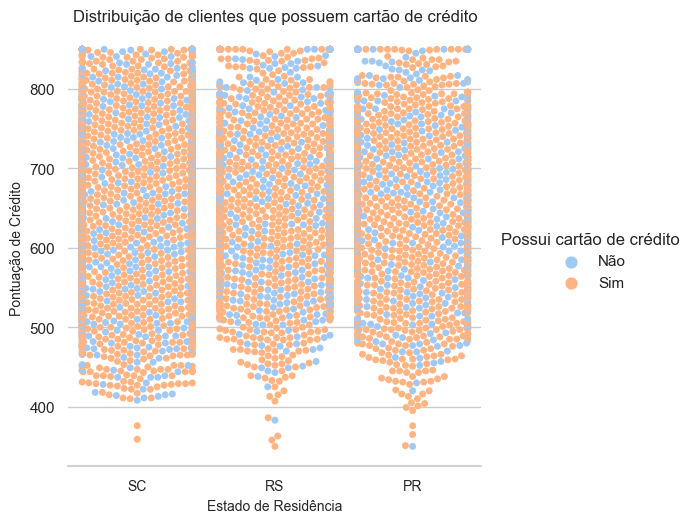

In [19]:
%matplotlib notebook
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

ax = sns.catplot(x='estado_residencia', y='pontuacao_credito', hue='possui_cartao_de_credito', kind='swarm', palette='pastel', data=base_cred, legend_out=True)

new_title = 'Possui cartão de crédito'
ax._legend.set_title(new_title)
# Replace labels
new_labels = ['Não', 'Sim']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

plt.ylabel('Pontuação de Crédito', size=10)
plt.xlabel('Estado de Residência', size=10)
plt.xticks(size=10)
plt.title('Distribuição de clientes que possuem cartão de crédito')
sns.despine(left=True)
plt.show()

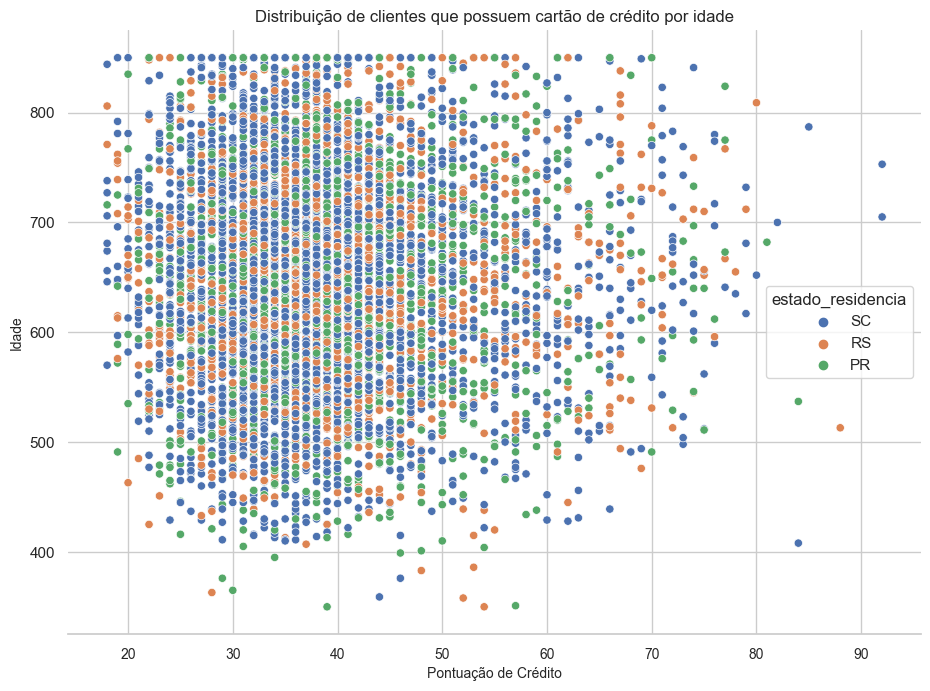

In [20]:
%matplotlib notebook
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 8))
sns.scatterplot(x="idade", y="pontuacao_credito", hue="estado_residencia", data=base_cred, sizes=(10000, 1000))

plt.ylabel('Idade', size=10)
plt.xlabel('Pontuação de Crédito', size=10)
plt.xticks(size=10)
plt.title('Distribuição de clientes que possuem cartão de crédito por idade')
sns.despine(left=True)
plt.show()

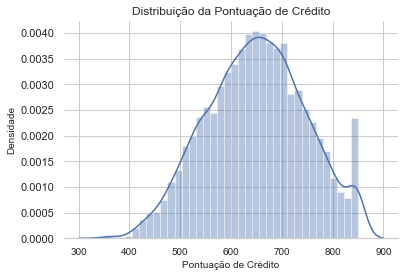

In [21]:
%matplotlib notebook
%matplotlib inline

sns.distplot(base_cred.pontuacao_credito)

plt.ylabel('Densidade', size=10)
plt.xlabel('Pontuação de Crédito', size=10)
plt.xticks(size=10)
plt.title('Distribuição da Pontuação de Crédito')
sns.despine(left=True)
plt.show()

## Verificando a correlação entre algumas variáveis:

In [22]:
features = ['pontuacao_credito', 'saldo_conta', 'possui_cartao_de_credito', 'membro_ativo']
corr = base_cred[features].corr()
corr

,pontuacao_credito,saldo_conta,possui_cartao_de_credito,membro_ativo
pontuacao_credito,1.000000,0.009761,-0.007987,0.033992
saldo_conta,0.009761,1.000000,-0.019398,-0.006482
possui_cartao_de_credito,-0.007987,-0.019398,1.000000,-0.014564
membro_ativo,0.033992,-0.006482,-0.014564,1.000000


<AxesSubplot:>

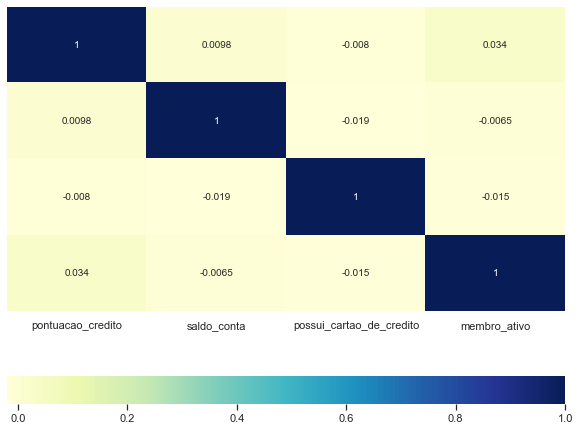

In [23]:
%matplotlib notebook
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, yticklabels=False, cmap='YlGnBu', cbar_kws={"orientation": "horizontal"})